<center><font size="16" ><b>Pythonic Pooling</b></font></center>

<img align="center" src="imgs/python.png" width="200"/>

### 1990 911 - 2180 lbs, 500 HP

<table align="left">
    <tr align="center"><th>original</th><th>green channel</th><th>convolution</th><th>pooled</th></tr>
<tr>
<td><img src="./imgs/porche_2.jpg"/> </td>
<td><img src="./imgs/green_porche.png"/></td>
<td><img src="./imgs/convoluted_porche.png"/></td>
<td><img src="./imgs/pooled_porche.png"/></td>
</tr>
</table>


In [3]:
from AI_Decomposed import *

### gather metadata - height, width, channel count

In [4]:
image_file = './imgs/porche_2.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

### split out color channels

In [5]:
save_image(red,width,'red_porche.png')
save_image(green,width,'green_porche.png')
save_image(blue,width,'blue_porche.png')

<table align="left">
    <tr align="center"><th>original</th><th>green channel</th><th>convolution</th><th>pooled</th></tr>
<tr>
<td><img src="./imgs/porche_2.jpg"/> </td>
<td><img src="./imgs/green_porche.png"/></td>
<td><img src="./imgs/convoluted_porche.png"/></td>
<td><img src="./imgs/pooled_porche.png"/></td>
</tr>
</table>

# pooling = data reduction
basically, shrink the image to reduce computational load

# Green Channel

width:  1200  height:  675


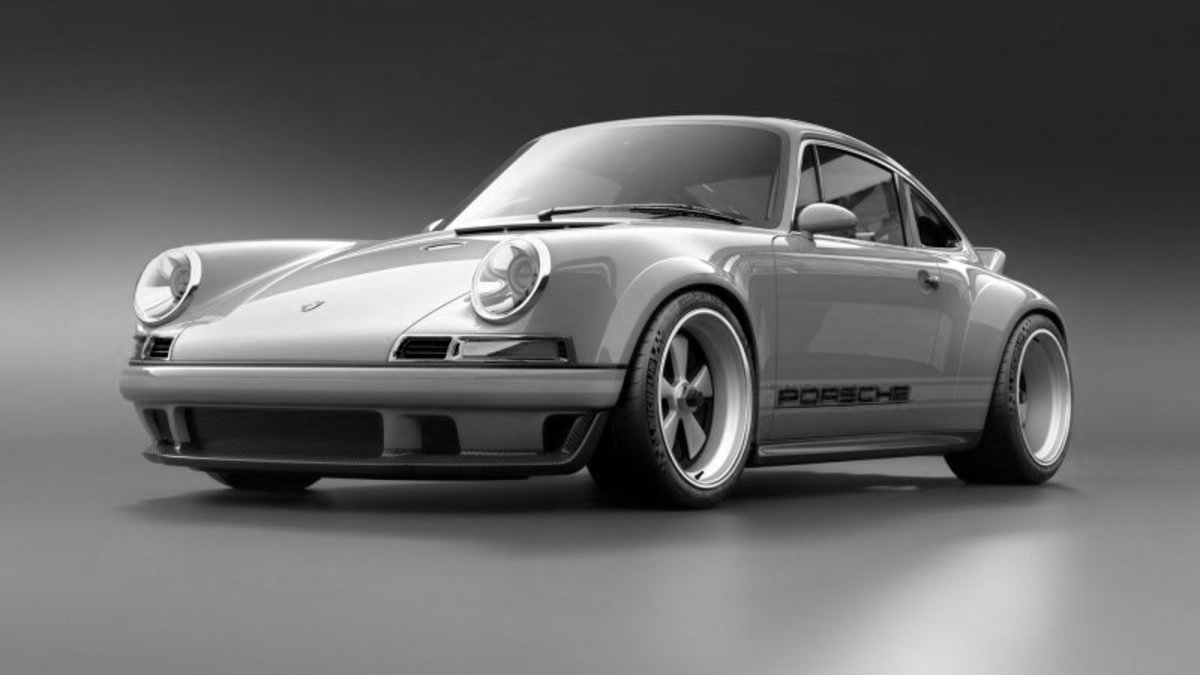

In [6]:
print('width: ', width, ' height: ', height)
display_channel(green, width)

# Convolve

8.3 seconds to convolve  810000  pixel image


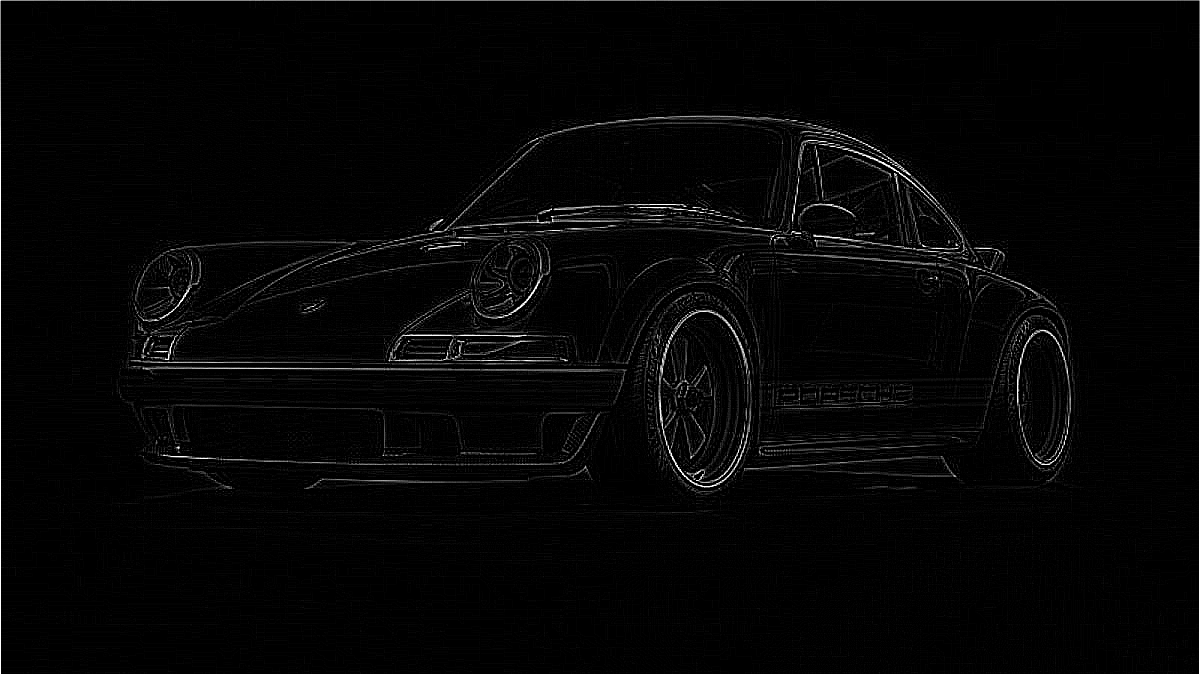

In [7]:
import time
start = time. time()
# create kernel
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
# convert to matrix
green_array = np.asarray(green).reshape(height,width)
# add zero pad border
green_padded = np.pad(green_array, 1, 'constant')
# convolute
green_convolved = convolve(green_padded, kernel)
print(round(time.time() - start, 2), 'seconds to convolve ', (width* height),' pixel image')
# display convolution
green_convolved_list = list(np.array(green_convolved).flat)
display_channel(green_convolved_list, width)
save_image(green_convolved_list,width,'convoluted_porche.png')

# Python Pooling Code

In [8]:
# credit https://stackoverflow.com/users/2005415/jason https://stackoverflow.com/questions/42463172
def pooling(mat,ksize,method='max'):
    '''Non-overlapping pooling on 2D or 3D data. <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx). <method>: str, 'max for max-pooling, 'mean' for mean-pooling.
    Return <result>: pooled matrix.'''
    m, n = mat.shape[:2]
    ky,kx=ksize
    _ceil=lambda x,y: int(np.ceil(x/float(y)))
    ny=m//ky
    nx=n//kx
    mat_pad=mat[:ny*ky, :nx*kx, ...]
    new_shape=(ny,ky,nx,kx)+mat.shape[2:]
    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(1,3))
    return result

# MAX Pooling 

In [9]:
green_array = np.asarray(green_convolved_list).reshape(height,width)

In [10]:
green_pooled = pooling(green_array,ksize=(2,2))

In [11]:
print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])

width:  600  height:  337


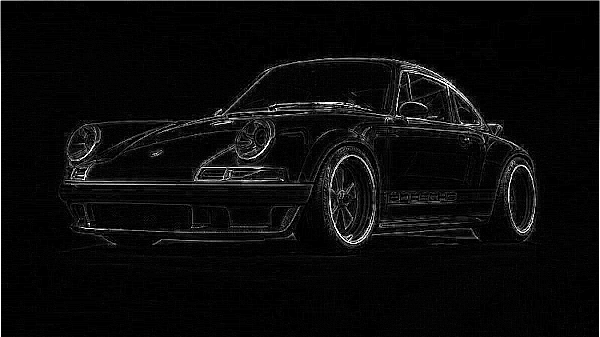

In [12]:
green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])
save_image(green_pooled_list,green_pooled.shape[1],'pooled_porche.png')

# MAX Pooling - 3 x 5 window

### Sometimes we have to resize and reshape images.  Usually this is done in the beginning to have all image be of the same dimension.  And eventually, we will have to flatten our image into a 1D list to feed into a neural network.

In [18]:
green_array = np.asarray(green_convolved_list).reshape(height,width)

In [19]:
green_pooled = pooling(green_array,ksize=(3,5))

In [20]:
print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])

width:  240  height:  225


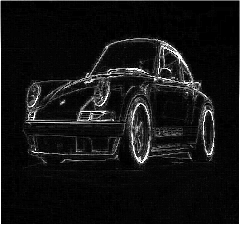

In [21]:
green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])

# MEAN Pooling - 5 x 3 window

width:  400  height:  135


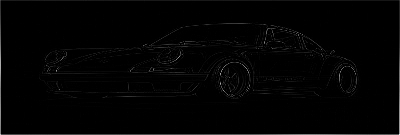

In [22]:
green_array = np.asarray(green_convolved_list).reshape(height,width)
green_pooled = pooling(green_array,ksize=(5,3),method='mean')
print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])
green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])

# NEXT -  Convolution and Pooling with C++

http://localhost:8888/notebooks/3_CPP_Convolution.ipynb

![raw](./imgs/pagani.jpg)